In [1]:
#workshop 1

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('~/Desktop/my_machine_learning/csv/simple_loan.csv')
df.head()

,age,employed,own_house,credit,target
0,young,False,n,fair,no
1,young,False,n,good,no
2,young,True,n,good,yes
3,young,True,y,fair,yes
4,young,False,n,fair,no


In [4]:
pd.pivot_table(index='employed', columns=['target'], values=['age'], 
               data=df, aggfunc='count', fill_value=0, margins=True)

age        
target    no yes All
employed            
False      6   5  11
True       0   6   6
All        6  11  17

In [5]:
feature_columns = ['age', 'employed', 'own_house', 'credit']
X = df[feature_columns]
y = df['target']

In [6]:
def labelEncode(data, columns):
    for i in columns:
        data[i + '_'], _ = pd.factorize(data[i], sort=True)

In [7]:
labelEncode(df, feature_columns)

In [8]:
df['target_'], class_names = pd.factorize(df.target)
df

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_,target_
0,young,False,n,fair,no,2,0,0,1,0
1,young,False,n,good,no,2,0,0,2,0
2,young,True,n,good,yes,2,1,0,2,1
3,young,True,y,fair,yes,2,1,1,1,1
4,young,False,n,fair,no,2,0,0,1,0
5,middle,False,n,fair,no,0,0,0,1,0
6,middle,False,n,good,no,0,0,0,2,0
7,middle,True,y,good,yes,0,1,1,2,1
8,middle,False,y,excellent,yes,0,0,1,0,1
9,middle,False,y,excellent,yes,0,0,1,0,1


In [9]:
enc_columns = ['age_', 'employed_', 'own_house_', 'credit_']
X = df[enc_columns]
y = df['target_']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
model.score(X_test, y_test)

1.0

In [15]:
X_input = [[0,1,1,1], [1,0,0,2], [1,1,0,1], [2,0,1,1]]
y_predict = model.predict(X_input)
print(y_predict)

[1 0 1 1]


In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
model = GaussianNB()

In [18]:
cvs = cross_val_score(model, X, y, cv=5)
print('cross val score: {}'.format(cvs))
print('mean: {:.4f}'.format(cvs.mean()))

cross val score: [1.         1.         1.         1.         0.66666667]
mean: 0.9333


In [19]:
#workshop 3

In [20]:
import seaborn as sb
import matplotlib.pyplot as plt

In [21]:
df = sb.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

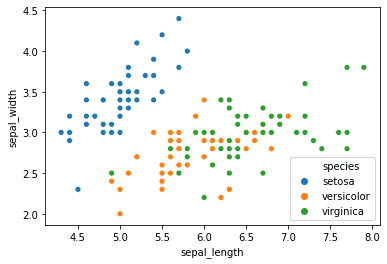

In [23]:
sb.scatterplot('sepal_length', 'sepal_width', data=df, hue='species')
plt.show()

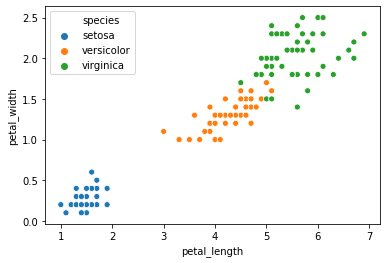

In [24]:
sb.scatterplot('petal_length', 'petal_width', data=df, hue='species')
plt.show()

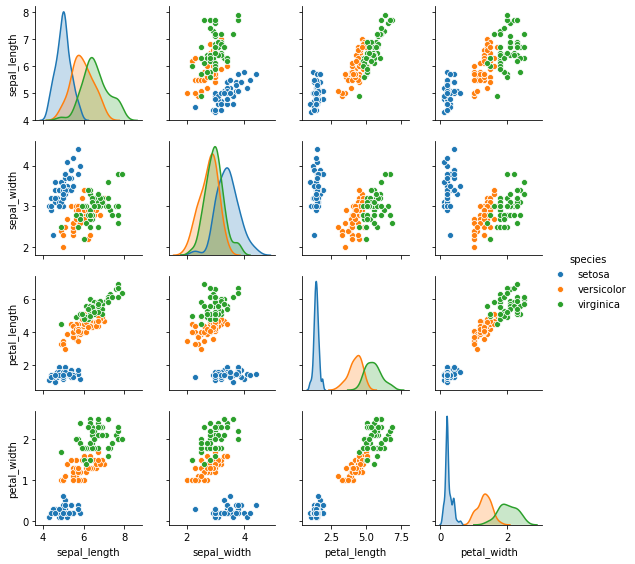

In [25]:
sb.pairplot(df, hue='species', height=2.0)
plt.show()

In [26]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
y = df['species']
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [28]:
X.shape, y.shape

((150, 4), (150,))

In [29]:
#workshop 5

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [31]:
model = GaussianNB()

In [32]:
cvs = cross_val_score(model, X, y, cv=10)
print('Cross val score: {}'.format(cvs))
print('Mean score: ', cvs.mean().round(4))

Cross val score: [0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]
Mean score:  0.9533


In [33]:
#workshop 6

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
(label, count) = np.unique(y_test, return_counts=True)
freq = np.asanyarray((label,count)).T
print(freq)

[['setosa' 8]
 ['versicolor' 15]
 ['virginica' 22]]


In [37]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
y_pred = model.predict(X_test)

In [39]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy Score: 0.9556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.93      0.93      0.93        15
   virginica       0.95      0.95      0.95        22

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[ 8  0  0]
 [ 0 14  1]
 [ 0  1 21]]


In [40]:
dy = pd.DataFrame()

In [41]:
dy['y_test'] = y_test
dy['y_pred'] = y_pred
dy['result'] = y_test == y_pred
dy.head()

,y_test,y_pred,result
108,virginica,virginica,True
103,virginica,virginica,True
87,versicolor,versicolor,True
133,virginica,versicolor,False
21,setosa,setosa,True


In [42]:
dy[dy['result']==False]

,y_test,y_pred,result
133,virginica,versicolor,False
77,versicolor,virginica,False


In [43]:
#workshop 7

In [44]:
import numpy as np

In [45]:
X_input = [[4.7, 3.6, 2.0, 0.8], [6.5, 2.5, 4.8, 1.4]]

In [46]:
print(model.predict(X_input))

['versicolor' 'versicolor']


In [47]:
print(y.unique())
print(model.predict_proba(X_input).round(8))

['setosa' 'versicolor' 'virginica']
[[3.7007690e-01 6.2992050e-01 2.6100000e-06]
 [0.0000000e+00 9.8284729e-01 1.7152710e-02]]


In [48]:
# xpe = X_input[:,:1].reshape(1, -1)
# xpe
# ype = X_input[:,3:4].reshape(1, -1)[0]

In [49]:
#workshop 9

In [50]:
from sklearn.svm import SVC

In [51]:
model = SVC(kernel='linear')
cvs = cross_val_score(model, X, y, cv=10)
print('cross_val_score {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}'.format(cvs.mean() * 100))

cross_val_score [1.    0.933 1.    1.    0.867 1.    0.933 1.    1.    1.   ]
mean (%) = 97.333


In [52]:
model.fit(X, y)
print(model.predict(X_input))

['setosa' 'versicolor']


In [53]:
model = SVC(kernel='linear', probability=True)
cvs = cross_val_score(model, X, y, cv=10)
print('cross_val_score {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}'.format(cvs.mean() * 100))

cross_val_score [1.    0.933 1.    1.    0.867 1.    0.933 1.    1.    1.   ]
mean (%) = 97.333


In [54]:
model = SVC(kernel='poly', degree=3, gamma='auto')
cvs = cross_val_score(model, X, y, cv=10)
print('cross_val_score {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}'.format(cvs.mean() * 100))

cross_val_score [1.    1.    1.    1.    0.933 0.933 0.867 1.    1.    1.   ]
mean (%) = 97.333


In [55]:
model = SVC(gamma='auto')
cvs = cross_val_score(model, X, y, cv=10)
print('cross_val_score {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}'.format(cvs.mean() * 100))

cross_val_score [1.    0.933 1.    1.    1.    0.933 0.933 1.    1.    1.   ]
mean (%) = 98.000


In [56]:
#workshop 10

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
model = KNeighborsClassifier(n_neighbors=3)
cvs = cross_val_score(model, X, y, cv=10)
print('cross_val_score {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}'.format(cvs.mean() * 100))

cross_val_score [1.    0.933 1.    0.933 0.867 1.    0.933 1.    1.    1.   ]
mean (%) = 96.667


In [59]:
model = KNeighborsClassifier(n_neighbors=1)
cvs = cross_val_score(model, X, y, cv=10)
print('cross_val_score {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}'.format(cvs.mean() * 100))

cross_val_score [1.    0.933 1.    0.933 0.867 1.    0.867 1.    1.    1.   ]
mean (%) = 96.000


In [60]:
model = KNeighborsClassifier(n_neighbors=2)
cvs = cross_val_score(model, X, y, cv=10)
print('cross_val_score {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}'.format(cvs.mean() * 100))

cross_val_score [1.    0.933 1.    0.933 0.867 1.    0.867 0.933 1.    1.   ]
mean (%) = 95.333


In [61]:
model = KNeighborsClassifier(n_neighbors=5)
cvs = cross_val_score(model, X, y, cv=10)
print('cross_val_score {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}'.format(cvs.mean() * 100))

cross_val_score [1.    0.933 1.    1.    0.867 0.933 0.933 1.    1.    1.   ]
mean (%) = 96.667


In [62]:
model = KNeighborsClassifier(n_neighbors=7)
cvs = cross_val_score(model, X, y, cv=10)
print('cross_val_score {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}'.format(cvs.mean() * 100))

cross_val_score [1.    0.933 1.    1.    0.867 0.933 0.933 1.    1.    1.   ]
mean (%) = 96.667


In [63]:
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [64]:
print(model.predict(X_input))

['setosa' 'versicolor']


In [65]:
len(X_train)

105

In [66]:
import scikitplot as skplot
from sklearn.ensemble import RandomForestClassifier

In [67]:
model = RandomForestClassifier(n_estimators=80)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
class_names = df['species'].unique()
class_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [69]:
y_predict = model.predict(X_test)
y_predict

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [70]:
print('Score -> {:.4f}'.format(model.score(X_test, y_test)))

Score -> 0.9111


In [71]:
print(classification_report(y_test, y_predict, target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.82      0.93      0.87        15
   virginica       0.95      0.86      0.90        22

    accuracy                           0.91        45
   macro avg       0.92      0.93      0.93        45
weighted avg       0.92      0.91      0.91        45



In [72]:
print(confusion_matrix(y_test, y_predict))

[[ 8  0  0]
 [ 0 14  1]
 [ 0  3 19]]


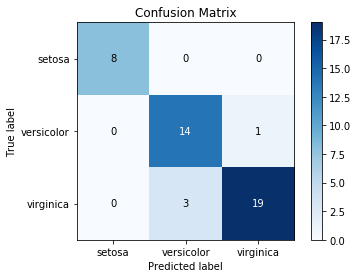

In [73]:
skplot.metrics.plot_confusion_matrix(y_test, y_predict)
plt.show()

In [74]:
#workshop 12

In [75]:
print(y.unique())

['setosa' 'versicolor' 'virginica']


In [76]:
from sklearn.cluster import KMeans

In [99]:
model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(X)

In [100]:
df['cluster'] = y_kmeans
df.sample(8)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
106,4.9,2.5,4.5,1.7,virginica,1
89,5.5,2.5,4.0,1.3,versicolor,1
36,5.5,3.5,1.3,0.2,setosa,0
71,6.1,2.8,4.0,1.3,versicolor,1
131,7.9,3.8,6.4,2.0,virginica,2
132,6.4,2.8,5.6,2.2,virginica,2
22,4.6,3.6,1.0,0.2,setosa,0
81,5.5,2.4,3.7,1.0,versicolor,1


In [101]:
df[df['cluster']==0].head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [102]:
df[df['cluster']==1].head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
50,7.0,3.2,4.7,1.4,versicolor,1
51,6.4,3.2,4.5,1.5,versicolor,1
53,5.5,2.3,4.0,1.3,versicolor,1
54,6.5,2.8,4.6,1.5,versicolor,1
55,5.7,2.8,4.5,1.3,versicolor,1


In [103]:
df[df['cluster']==2].head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
52,6.9,3.1,4.9,1.5,versicolor,2
77,6.7,3.0,5.0,1.7,versicolor,2
100,6.3,3.3,6.0,2.5,virginica,2
102,7.1,3.0,5.9,2.1,virginica,2
103,6.3,2.9,5.6,1.8,virginica,2


In [104]:
pvt = df.pivot_table(index='species', columns=['cluster'], values='petal_length',
                    fill_value=0, aggfunc='count')
pvt

cluster,0,1,2
species,,,
setosa,50,0,0
versicolor,0,48,2
virginica,0,14,36


In [105]:
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [106]:
x_centorids = model.cluster_centers_[:,0]
y_centorids = model.cluster_centers_[:,1]

In [111]:
color_dict = {0:'blue', 1:'red', 2:'g'}
centorid_colors = ['r', 'b', 'm']

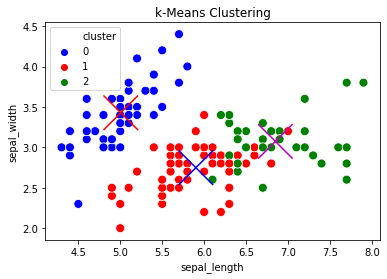

In [112]:
sb.scatterplot('sepal_length', 'sepal_width', data=df, hue='cluster', palette=color_dict, s=80)
plt.scatter(x_centorids, y_centorids, s=1200, marker='x', c=centorid_colors)
plt.title('k-Means Clustering')
plt.show()

In [113]:
print(model.predict(X_input))

[0 1]


In [115]:
w1 = df[(df['cluster']==1) & (df['species']!='versicolor')]
w2 = df[(df['cluster']==2) & (df['species']!='virginica')]

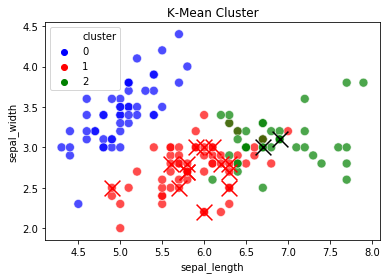

In [119]:
color_dict = {0:'blue', 1:'red', 2:'g'}
sb.scatterplot('sepal_length', 'sepal_width', data=df, hue='cluster', 
               palette=color_dict, s=80, alpha=0.7)
plt.scatter(w1['sepal_length'], w1['sepal_width'], marker='x', s=250, c='red')
plt.scatter(w2['sepal_length'], w2['sepal_width'], marker='x', s=250, c='black')
plt.title('K-Mean Cluster')
plt.show()

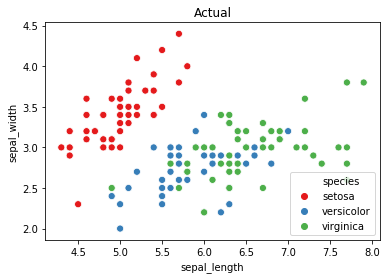

In [120]:
sb.scatterplot('sepal_length', 'sepal_width', data=df, hue='species', s=50, palette='Set1')
plt.title('Actual')
plt.show()

In [121]:
#workshop 13

In [123]:
import numpy as np
import matplotlib.pyplot as plt

In [124]:
x = [120, 150, 170, 200, 200, 200, 204, 204, 205, 215, 250, 270, 300, 305]
y = [1,1,1,1,1,0,0,1,1,0,0,0,0,0]

In [143]:
x = np.array(x)
y = np.array(y)
y

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0])

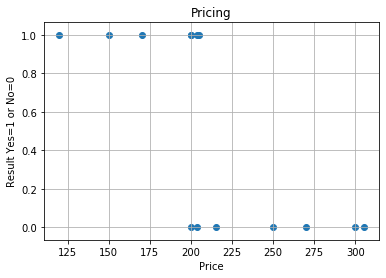

In [144]:
plt.scatter(x, y)
plt.title('Pricing')
plt.xlabel('Price')
plt.ylabel('Result Yes=1 or No=0')
plt.grid()
plt.show()

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
model = LogisticRegression(solver='lbfgs')

In [150]:
X = x.reshape(-1, 1)


In [151]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
X_input = np.array([198, 200, 204, 205, 206, 207, 210]).reshape(-1, 1)
y_predict = model.predict(X_input)
y_predict

array([1, 1, 1, 1, 0, 0, 0])

In [153]:
print('Price | Pred')
print('-------------------')
for i, val in enumerate(y_predict):
    print('{:5.1f} |  {}'.format(X_input[i][0], val))

Price | Pred
-------------------
198.0 |  1
200.0 |  1
204.0 |  1
205.0 |  1
206.0 |  0
207.0 |  0
210.0 |  0


In [154]:
y_pred_prob = model.predict_proba(X_input)
y_pred_prob

array([[0.19416994, 0.80583006],
       [0.26164067, 0.73835933],
       [0.43386545, 0.56613455],
       [0.48169393, 0.51830607],
       [0.52986024, 0.47013976],
       [0.57747672, 0.42252328],
       [0.70908504, 0.29091496]])

In [156]:
print('Price | Pred | Prob(Y)')
print('-------------------')
for i, val in enumerate(y_pred_prob):
    print('{:5.1f} |  {} |  {:.3f}'.format(X_input[i][0], y_predict[i], val[1]))

Price | Pred | Prob(Y)
-------------------
198.0 |  1 |  0.806
200.0 |  1 |  0.738
204.0 |  1 |  0.566
205.0 |  1 |  0.518
206.0 |  0 |  0.470
207.0 |  0 |  0.423
210.0 |  0 |  0.291


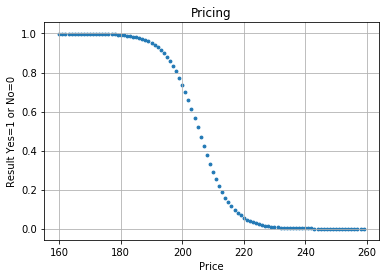

In [163]:
prices = np.arange(160, 260, 1)
prob = []
for i in prices:
    p_loss, p_win = model.predict_proba([[i]])[0]
    prob.append(p_win)

plt.scatter(prices, prob, s=8)
plt.title('Pricing')
plt.xlabel('Price')
plt.ylabel('Result Yes=1 or No=0')
plt.grid()
plt.show()